# Preprocessing data in MNE-Python

`
Authors:
Britta Westner, Alexandre Gramfort, Denis A. Engemann, Anne Cheylus
`

## Setup

We start out with loading the packages we need. These include `matplotlib` for plotting, `os` for path management, `numpy` for numerical computations, and of course `mne` and `mne_bids`.
We can also use matplotlib magic to ask for figure to be plotted inline. 

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mne
import mne_bids
import pandas

Let's double check your MNE-Python version. This should give back 1.5.0 or more

In [2]:
mne.__version__

'1.5.1'

We set the log-level of MNE-Python to 'warning' so the output is less verbose:

In [3]:
mne.set_log_level('warning')

### Help!

Remember, if you need help just ask ... the machine!
Let's see how to get the docstring information for a function - here, the function `set_log_level`.

In [4]:
mne.set_log_level?

Signature: mne.set_log_level(verbose=None, return_old_level=False, add_frames=None)
Docstring:
Set the logging level.

Parameters
----------
verbose : bool, str, int, or None
    The verbosity of messages to print. If a str, it can be either DEBUG,
    INFO, WARNING, ERROR, or CRITICAL. Note that these are for
    convenience and are equivalent to passing in logging.DEBUG, etc.
    For bool, True is the same as 'INFO', False is the same as 'WARNING'.
    If None, the environment variable MNE_LOGGING_LEVEL is read, and if
    it doesn't exist, defaults to INFO.
return_old_level : bool
    If True, return the old verbosity level.

add_frames : int | None
    If int, enable (>=1) or disable (0) the printing of stack frame
    information using formatting. Default (None) does not change the
    formatting. This can add overhead so is meant only for debugging.

Returns
-------
old_level : int
    The old level. Only returned if ``return_old_level`` is True.
File:      ~/.virtualenvs/py311ga

## Get the path to the data with mne_bids

You should have downloaded the `WorkingMemory bids_data` folder with the download notebook: [0a-Download_data.ipynb](0a-Download_data.ipynb). 

We have to let Python know where to find this folder on your disk. 

You will have to adjust the `bids_root` path below to reflect your computer and path structure!
You can print the whole path and check the directory to double check it's correct.

In [5]:
bids_root = './bids_data'

In [6]:
bids_path = mne_bids.BIDSPath(root=bids_root, 
                              task='WorkingMemory',
                              subject='02',
                              session='01', 
                              run=1, 
                              datatype='meg')
print(bids_path)

bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-01_meg.ds


This path is just a construction based on BIDS standards. To check if the file really exists, you can invoke:

In [7]:
bids_path.fpath.exists()

True

## Access and read the raw data

We can read raw data with `mne_bids.read_raw_bids` or directly with `mne.io.read_raw_ctf`. 

With mne_bids, you also load sidecar TSV files with information on events and channels.

In [8]:
mne_bids.read_raw_bids?

Signature: mne_bids.read_raw_bids(bids_path, extra_params=None, verbose=None)
Docstring:
Read BIDS compatible data.

Will attempt to read associated events.tsv and channels.tsv files to
populate the returned raw object with raw.annotations and raw.info['bads'].

Parameters
----------
bids_path : BIDSPath
    The file to read. The :class:`mne_bids.BIDSPath` instance passed here
    **must** have the ``.root`` attribute set. The ``.datatype`` attribute
    **may** be set. If ``.datatype`` is not set and only one data type
    (e.g., only EEG or MEG data) is present in the dataset, it will be
    selected automatically.

    .. note::
       If ``bids_path`` points to a symbolic link of a ``.fif`` file
       without a ``split`` entity, the link will be resolved before
       reading.

extra_params : None | dict
    Extra parameters to be passed to MNE read_raw_* functions.
    Note that the ``exclude`` parameter, which is supported by some
    MNE-Python readers, is not supported; instea

In [9]:
raw = mne_bids.read_raw_bids(bids_path=bids_path, 
                             verbose='info', 
                             extra_params=dict(preload=False,
                                               system_clock='ignore'))

ds directory : /crnldata/pam/nan/LyonCutting_MNE_2023/bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -0.65   79.38   -0.00 mm <->   -0.65   79.38   -0.00 mm (orig :  -48.16   62.93 -262.28 mm) diff =    0.000 mm
       0.65  -79.38    0.00 mm <->    0.65  -79.38    0.00 mm (orig :   64.17  -49.26 -260.64 mm) diff =    0.000 mm
      97.86    0.00    0.00 mm <->   97.86    0.00    0.00 mm (orig :   75.40   73.54 -237.29 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /crnldata/pam/nan/LyonCutting_MNE_2023/bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-01_meg.ds/sub-02_ses-01_task-WorkingMemory_run-01_meg.meg4: 
    System clock channel is availab

/tmp/ipykernel_1768552/1077507776.py:1: RuntimeWarning: No BIDS -> MNE mapping found for channel type "EYEGAZE". Type of channel "UADC009" will be set to "misc".
  raw = mne_bids.read_raw_bids(bids_path=bids_path,
/tmp/ipykernel_1768552/1077507776.py:1: RuntimeWarning: No BIDS -> MNE mapping found for channel type "EYEGAZE". Type of channel "UADC010" will be set to "misc".
  raw = mne_bids.read_raw_bids(bids_path=bids_path,
/tmp/ipykernel_1768552/1077507776.py:1: RuntimeWarning: No BIDS -> MNE mapping found for channel type "PUPIL". Type of channel "UADC013" will be set to "misc".
  raw = mne_bids.read_raw_bids(bids_path=bids_path,
/tmp/ipykernel_1768552/1077507776.py:1: RuntimeWarning: The unit for channel(s) SCLK01, UADC005, UADC007, UADC009, UADC010, UADC013, UADC016 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path=bids_path,


We can see that `mne_bids` changed the units for miscelaneous channels, eyetrack data and system clock from V to NA, and changed all their types to `misc`
For general info on importing data you can check:
- for MEG: https://mne.tools/stable/auto_tutorials/io/plot_10_reading_meg_data.html
- for EEG: https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html
- whith BIDS: https://mne.tools/mne-bids/stable/auto_examples/read_bids_datasets.html

## Understand your data file


Now let's look at the measurement info. It can give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.

In [10]:
print(raw.info)

<Info | 17 non-empty values
 bads: []
 ch_names: USPT001, SCLK01, BG1, BG2, BG3, BP1, BP2, BP3, BR1, BR2, BR3, ...
 chs: 1 Stimulus, 7 misc, 28 Reference Magnetometers, 272 Magnetometers
 comps: 5 items (list)
 ctf_head_t: CTF/4D/KIT head -> head transform
 custom_ref_applied: False
 dev_ctf_t: MEG device -> CTF/4D/KIT head transform
 dev_head_t: MEG device -> head transform
 dig: 3 items (3 Cardinal)
 experimenter: rquentin
 highpass: 0.0 Hz
 hpi_results: 1 item (list)
 line_freq: 60.0
 lowpass: 600.0 Hz
 meas_date: 2016-03-11 16:05:00 UTC
 meas_id: 4 items (dict)
 nchan: 308
 projs: []
 sfreq: 1200.0 Hz
 subject_info: 2 items (dict)
>


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>How many channels do you have for each type of sensors?</li>
    <li>What is the sampling frequency?</li>
    <li>Has the data been filtered?</li>
    <li>What is the frequency of the line noise?</li>
    <li>Is there any bad channel?</li>
    </ul>
</div>

## A closer look at the info dictionary

raw.info is just a dictionary:

In [11]:
isinstance(raw.info, dict)

True

In [12]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

So we can access its elements using square brackets and keys:

In [13]:
raw.info['sfreq']  # Sampling frequency

1200.0

In [14]:
raw.info['line_freq'] # Power noise

60.0

In [15]:
raw.info['bads'] # Bad channels

[]

## A closer look at the channels
Next let's see what channels are present. It is available via the `raw.ch_names` attribute.

In [16]:
type(raw.ch_names)

list

In [17]:
raw.ch_names[:10]  # this prints the first ten channels

['USPT001', 'SCLK01', 'BG1', 'BG2', 'BG3', 'BP1', 'BP2', 'BP3', 'BR1', 'BR2']

You can index it as a list

In [18]:
raw.ch_names[42]

'MLC31'

We can also query the channel type of a specific channel:

In [19]:
channel_type = mne.io.pick.channel_type(raw.info, 0)
print('Channel #0 (', raw.ch_names[0],') is of type:', channel_type)  # print this out in a neat way

channel_type = mne.io.pick.channel_type(raw.info, 1)
print('Channel #1 (', raw.ch_names[1],') is of type:', channel_type)  

channel_type = mne.io.pick.channel_type(raw.info, 2)
print('Channel #2 (', raw.ch_names[2],') is of type:', channel_type)  

channel_type = mne.io.pick.channel_type(raw.info, 30)
print('Channel #30 (', raw.ch_names[30],') is of type:', channel_type)

Channel #0 ( USPT001 ) is of type: stim
Channel #1 ( SCLK01 ) is of type: misc
Channel #2 ( BG1 ) is of type: ref_meg
Channel #30 ( MLC11 ) is of type: mag


The info also contains all the details about the sensors (type, locations, coordinate frame etc.) in `chs`:

In [20]:
len(raw.info['chs'])

308

In [21]:
type(raw.info['chs'])

list

In [22]:
raw.info['chs'][0]  # check the first channel

{'scanno': 1,
 'range': 1.0,
 'cal': 1.0,
 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'USPT001',
 'coil_type': 0 (FIFFV_COIL_NONE),
 'logno': 1,
 'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
 'kind': 3 (FIFFV_STIM_CH),
 'unit': 107 (FIFF_UNIT_V)}

In [23]:
raw.info['chs'][30]

{'scanno': 31,
 'range': 1.0,
 'cal': -3.2692046642121473e-16,
 'loc': array([-0.01104642,  0.06681593,  0.079046  ,  0.74337418,  0.62190645,
        -0.2462259 , -0.66765212,  0.66765212, -0.32936497, -0.04044096,
         0.40923466,  0.91153251]),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MLC11',
 'coil_type': 201609,
 'unit': 112 (FIFF_UNIT_T),
 'kind': 1 (FIFFV_MEG_CH),
 'logno': 1,
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

Now that we know that there are MEG channels in the data, we can plot their position:

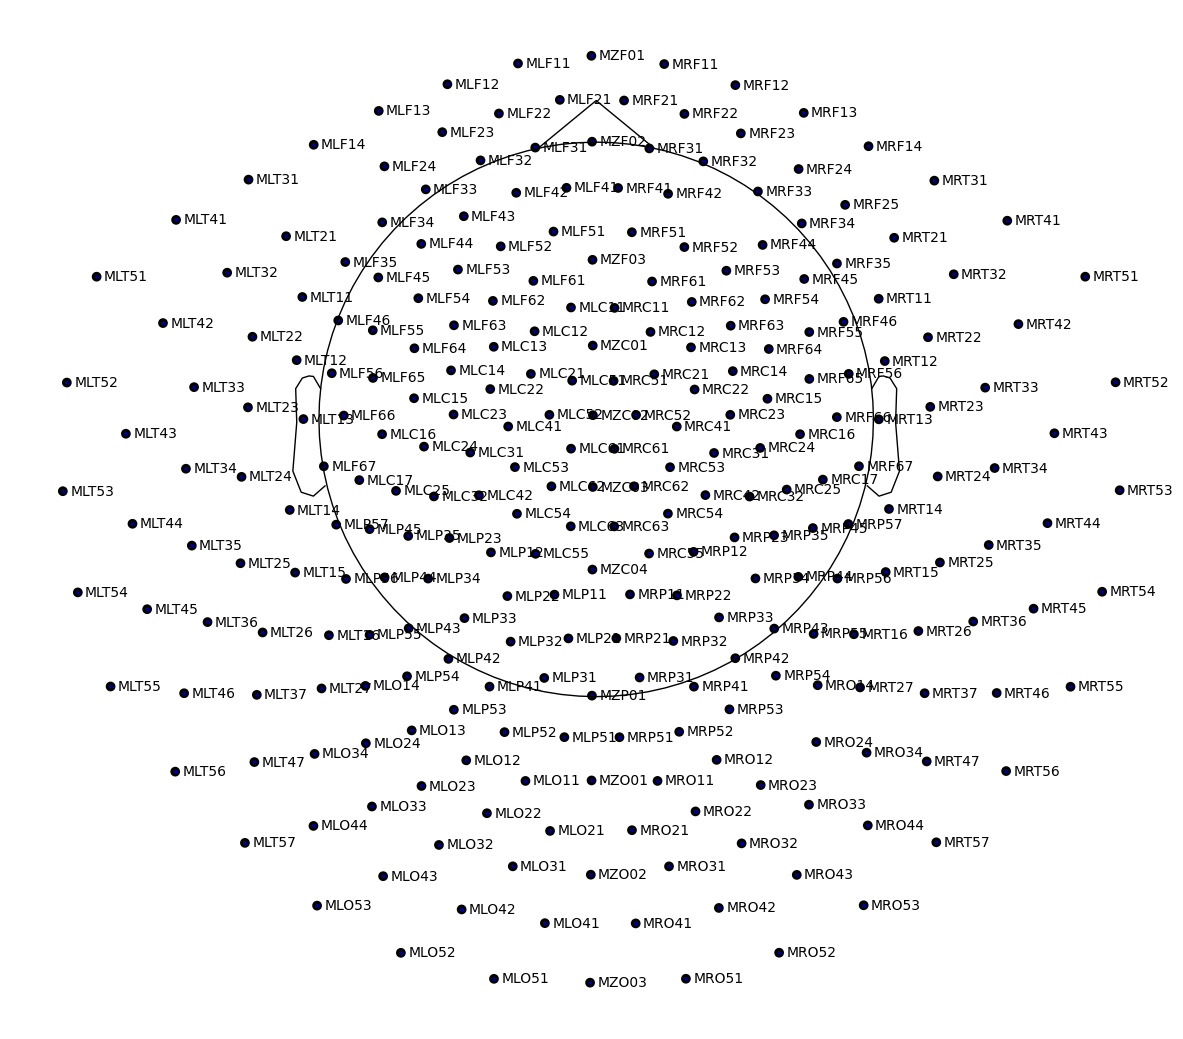

In [24]:
# Increase figure size to give some place for our 272 MEG channels
plt.figure(figsize=(15,15))
raw.plot_sensors(kind='topomap', ch_type='mag', show_names=True, axes=plt.gca());

## Accessing the data

To access the data just use the `[]` syntax as to access any element of a list, dict etc. Note that `raw[]` returns two things: the data and the times array.

In [25]:
start, stop = 0, 50000
data, times = raw['USPT001', start:stop]  # fetch first 50000 points in stimulus channel
print(data.shape)
print(times.shape)

(1, 50000)
(50000,)


In [26]:
times[:10]  # always starts at 0 by convention

array([0.        , 0.00083333, 0.00166667, 0.0025    , 0.00333333,
       0.00416667, 0.005     , 0.00583333, 0.00666667, 0.0075    ])

In [27]:
data[0,:10] # data shape matches channels x time

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Look at the event structure of the data

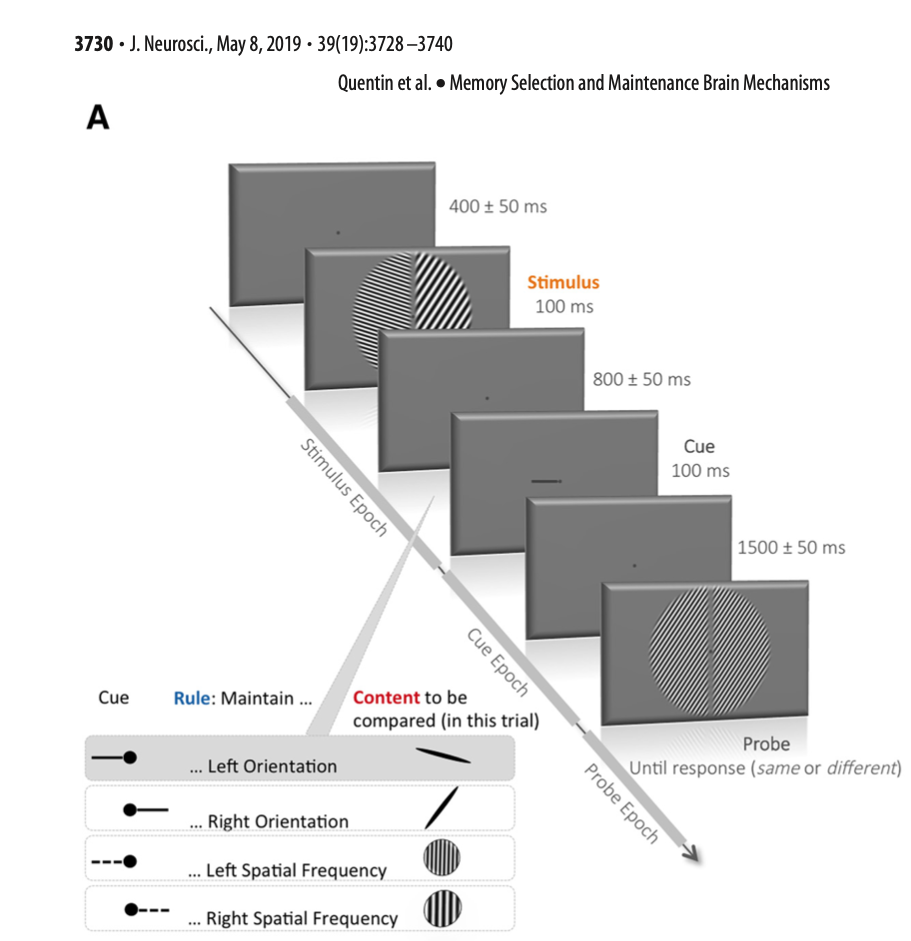


Triggers are delivered at the time of

- Stimulus Presentation with a code for the stimulus ranging from 1 to 125
- Cue Presention :
    - Left Spatial Frequency with code 126
    - Left Oriention with code 127
    - Right Spatial Frequency with code 128
    - Right Oriention with code 129
- Probe Presentation with codes ranging from 130 to 155


In [28]:
pandas.DataFrame(raw.annotations[:10])

,onset,duration,description,orig_time
0,7.588333,0.0,stimulus45,2016-03-11 16:05:00+00:00
1,8.475833,0.0,CueLeftSF,2016-03-11 16:05:00+00:00
2,10.122500,0.0,Probe4,2016-03-11 16:05:00+00:00
3,20.232500,0.0,stimulus84,2016-03-11 16:05:00+00:00
4,21.182500,0.0,CueRightOrient,2016-03-11 16:05:00+00:00
5,22.800833,0.0,Probe4,2016-03-11 16:05:00+00:00
6,25.430000,0.0,stimulus2,2016-03-11 16:05:00+00:00
7,26.330000,0.0,CueLeftSF,2016-03-11 16:05:00+00:00
8,27.962500,0.0,Probe4,2016-03-11 16:05:00+00:00
9,30.678333,0.0,stimulus115,2016-03-11 16:05:00+00:00


In [29]:
stim_id = dict([ ('stimulus' + str(i), i) for i in range(1,126)] )
cue_id = {'CueLeftSF': 126,
          'CueLeftOrient/': 127,
          'CueRightSF': 128,
          'CueRightOrient': 129}
probe_id = dict([ ('Probe' + str(i-129), i) for i in range(130,156) ])
# merge all 3 in event_id
event_id = stim_id.copy()
event_id.update(cue_id)
event_id.update(probe_id)

In [30]:
events, evtid = mne.events_from_annotations(raw, event_id)
print(events[:10])

[[ 9106     0    45]
 [10171     0   126]
 [12147     0   133]
 [24279     0    84]
 [25419     0   129]
 [27361     0   133]
 [30516     0     2]
 [31596     0   126]
 [33555     0   133]
 [36814     0   115]]


<div class="alert alert-success">
    <b>Exercise</b>:
    <ul>
    <li>What is the type of the variable events?</li>
    <li>What is the meaning of the 3 columns of events?</li>
    <li>How many events of the value 126 are there?
    </ul>
</div> 

### Exercice solution

In [31]:
type(events)

numpy.ndarray

see MNE documentation on events here: https://mne.tools/dev/glossary.html#term-events

In [32]:
np.count_nonzero(events[:,2] == 126)

13

### Correct for constant delay

Measurements with a photodiod revealed a constant delay of 48 ms between trigger and actual stimulus presentation. 

We need to correct the events accordingly.

In [33]:
delay = int(round(0.048 * raw.info['sfreq']))
events[:, 0] = events[:, 0] + delay

Let's visualize the paradigm:

In [34]:
cue_events = events[[i in [126, 127, 128, 129] for i in events[:, 2]]]  # take only cue events with code between 126 and 128

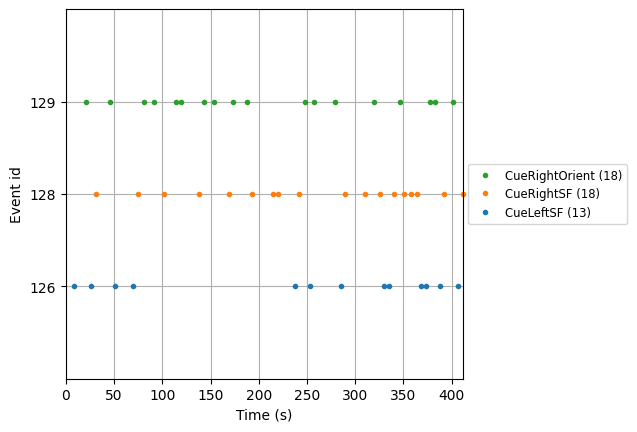

In [35]:
fig = mne.viz.plot_events(cue_events, raw.info['sfreq'], event_id=event_id, on_missing='ignore');

## Plotting raw data

Let's quickly look at our raw data! 

For full functionality, we ask matplotlib to show the plot in a separate window.

We also plot our shifted events, you can see the 48 ms delay measured with the photodiode between 

- original annotations based on BIDS _events.tsv files and 
- our newly computed events.

For more information on visualizing of raw data, see here: 
https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html


In [36]:
raw.info['bads']

[]

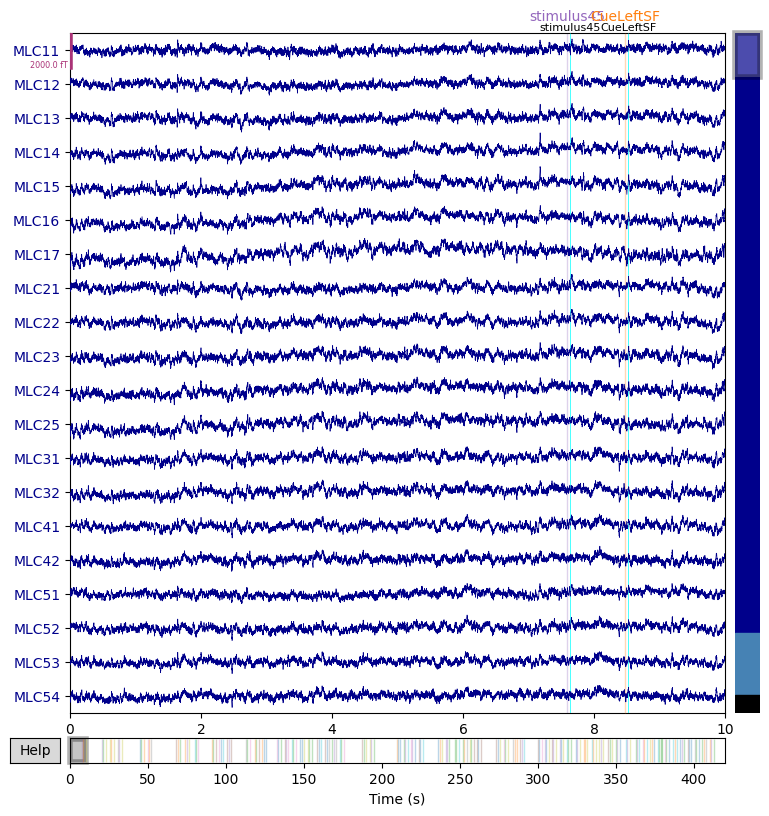

In [37]:
%matplotlib qt
raw.plot(event_id=event_id, events=events)

## Filtering the data 

We want to low-pass filter the data under 25 Hz using a linear-phase finite-impulse response (FIR) filter.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Which parameters do we have to set to achieve this, based on the docstring of the `filter` method?</li>
    </ul>
</div>


In [38]:
raw.filter?

Signature:
raw.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, channel *name

In [39]:
raw.load_data()
raw.filter(l_freq = None, h_freq=25.0, fir_design='firwin', verbose='INFO')

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 635 samples (0.529 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   14.5s


<RawCTF | sub-02_ses-01_task-WorkingMemory_run-01_meg.meg4, 308 x 504000 (420.0 s), ~1.16 GB, data loaded>

Now that we filtered our data, let's look at it again. Can you spot the difference?

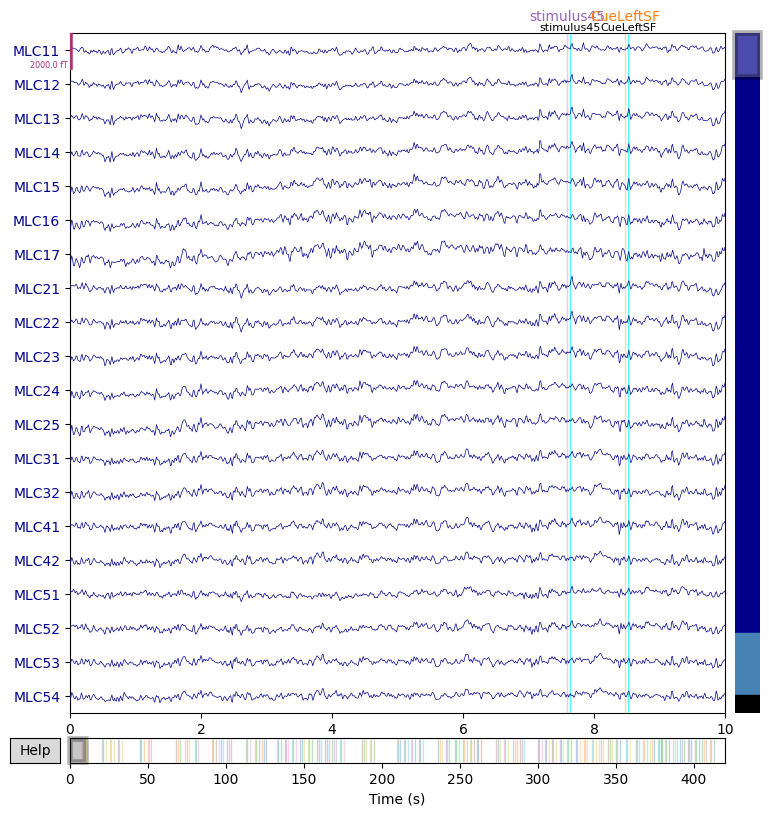

In [40]:
%matplotlib qt
raw.plot(event_id=event_id, events=events)

## Handling bad channels

Visual inspection of the raw data with `raw.plot` reveals an atypical signal for channel `MLT16` compared to its neighbors:

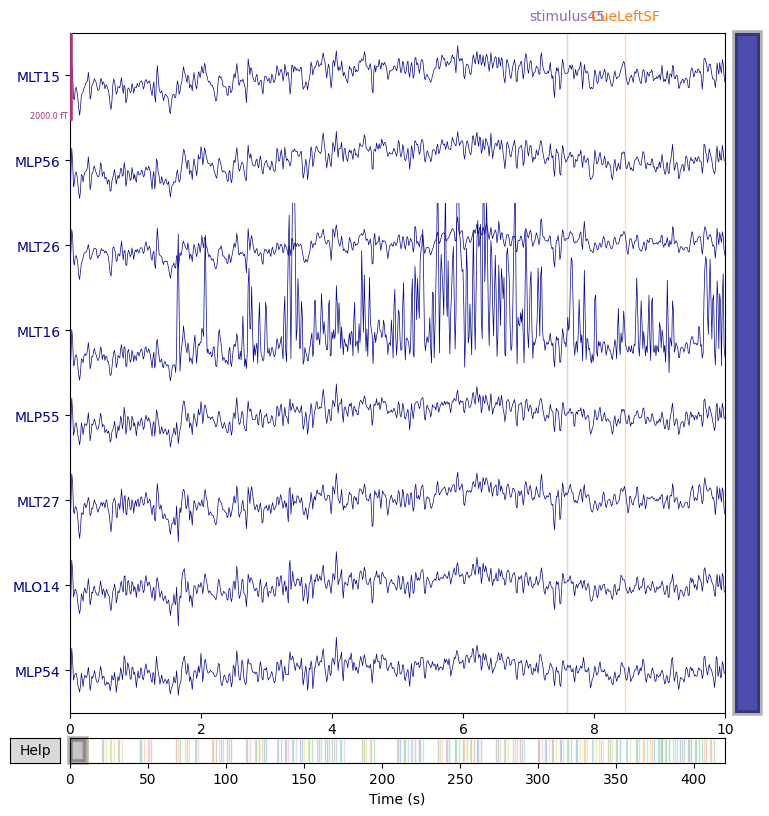

In [41]:
picks = mne.pick_channels(raw.ch_names, ['MLT15', 'MLP56', 
                                         'MLT26', 'MLT16', 'MLP55', 
                                         'MLT27', 'MLO14', 'MLP54'], 
                          ordered = True)
raw.plot(order=picks, n_channels=len(picks))

We can mark this channel as bad either interactively on `raw.plot()` or programmatically as below. This will make it easier to exlude it from further analyses. It now appears grayed on `raw.plot()`.

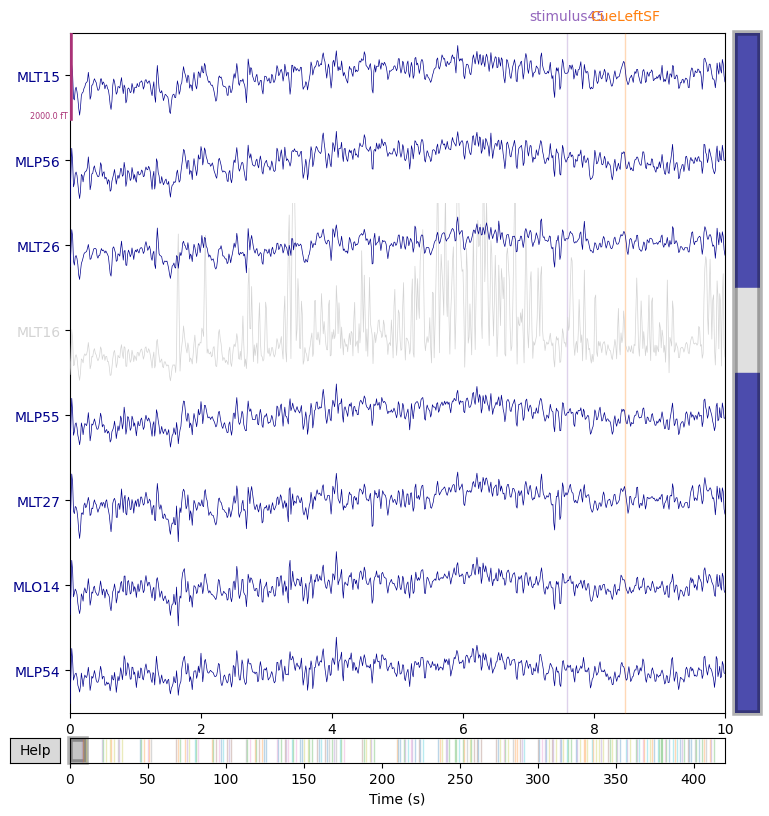

In [42]:
raw.info["bads"].append("MLT16")  # add a single channel
raw.plot(order=picks, n_channels=len(picks))

For more information on handling bad channels, see https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html

## Epoch data

We will focus on the timing around the initial stimulus presentation, before the subject sees the cue and the probe.

Define epochs parameters:

In [43]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.9  # end of each epoch (900ms after the trigger)

Define the baseline period:

In [44]:
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

We also pick MEG channels now - we don't need the trigger channel anymore.

In [45]:
picks = mne.pick_types(raw.info, meg=True, ref_meg = False,
                       stim=False, exclude='bads')

Now we can put all of this together and create stimulus epochs. We will use the `decim` parameter to downsample our signal. See the warning on https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.decimate

Our signal was at 1200 Hz so decimating by 10 should lead to a new sampling frequency of 120 Hz. To avoid aliasing effects, we need to make sure there is no significant power above half this frequency (60 Hz) wich is OK since we used a lowpass at 25 Hz.

In [46]:
epochs = mne.Epochs(raw, events, stim_id, tmin, tmax, proj=True, 
                    picks=picks, baseline=baseline, decim = 10,
                    detrend = 1,
                    on_missing='ignore', verbose='Error')

In [47]:
print(epochs)  # let's look at some details about the epochs object

<Epochs |  63 events (good & bad), -0.2 – 0.9 s, baseline -0.2 – 0 s, ~230 kB, data not loaded,
 'stimulus1': 1
 'stimulus2': 2
 'stimulus3': 0
 'stimulus4': 1
 'stimulus5': 3
 'stimulus6': 0
 'stimulus7': 2
 'stimulus8': 1
 'stimulus9': 0
 'stimulus10': 3
 and 115 more events ...>


In [48]:
epochs.load_data();  # load data in memory

## Visualizing epochs data

See [this page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) for options on how to visualize epochs.

We can also look at the epochs in a data browser window:

In [49]:
%matplotlib qt
epochs.plot(events=True);

/tmp/ipykernel_1768552/4283289819.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  epochs.plot(events=True);


## Merge epochs from several runs

We can do a loop to do the same processing steps on all runs and merge epochs in a single file for further processing

In [50]:
# specify a C locale to enable date reading on Linux
import locale
locale.setlocale(locale.LC_ALL, 'C')

'C'

In [51]:
mne_bids.get_entity_vals(bids_root, 'run')

['01', '02', '03', '04', '05', '06', '07', '08']

In [52]:
epochs_list = list()
for run in mne_bids.get_entity_vals(bids_root, 'run'):
    # update our bids PATH whith this run number
    bids_path = bids_path.update(run=run)
    print(bids_path)
    raw = mne_bids.read_raw_bids(bids_path=bids_path, 
                                 verbose='error', 
                                 extra_params=dict(preload=False,
                                                   system_clock='ignore'))
    # correct our stimulus channel
    raw.load_data()  # load data into memory
    # find triggers
    events_meg, evtid = mne.events_from_annotations(raw, event_id)
    # Add 48ms to the trigger events (according to delay with photodiod)
    events_meg[:, 0] += int(round(.048 * raw.info['sfreq']))
    # filter the raw
    raw.filter(l_freq=None, h_freq=25.0, fir_design='firwin')
    # Epoch the data
    tmin = -0.2
    tmax = 0.9
    epochs = mne.Epochs(raw, events_meg, event_id=stim_id,
                        tmin=tmin, tmax=tmax, preload=True,
                        baseline=(-0.2, 0), decim=10, 
                        detrend = 1,
                        on_missing='ignore', verbose=False)
    # Copy first run dev_head_t to following runs
    if run == '01':
       dev_head_t = epochs.info['dev_head_t']
    else:
       epochs.info['dev_head_t'] = dev_head_t
    epochs_list.append(epochs)
epochs = mne.epochs.concatenate_epochs(epochs_list)

bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-01_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-02_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-03_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-04_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-05_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-06_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-07_meg.ds
bids_data/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_run-08_meg.ds


/tmp/ipykernel_1768552/613224157.py:32: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(epochs_list)


## Save Epochs

We will save our epoched data in BIDS `derivatives` folder MNE-python likes epoched files to end with `-epo.fif` while mne_bids believes it is not conforming to BIDS standard, so we'll skip testing for conformance with `check = False`.

In [53]:
epochs_path = bids_path.copy().update(root = bids_path.root / 'derivatives' / 'stimulus_epoch_preprocessing',
                                      run = None,
                                      suffix = 'meg-epo',
                                      check = False,
                                      extension = ".fif")
# Create folder if necessary
epochs_path.mkdir(exist_ok=True)
# save epochs
epochs.save(str(epochs_path), overwrite=True)
print('Wrote',epochs_path)

Wrote bids_data/derivatives/stimulus_epoch_preprocessing/sub-02/ses-01/meg/sub-02_ses-01_task-WorkingMemory_meg-epo.fif


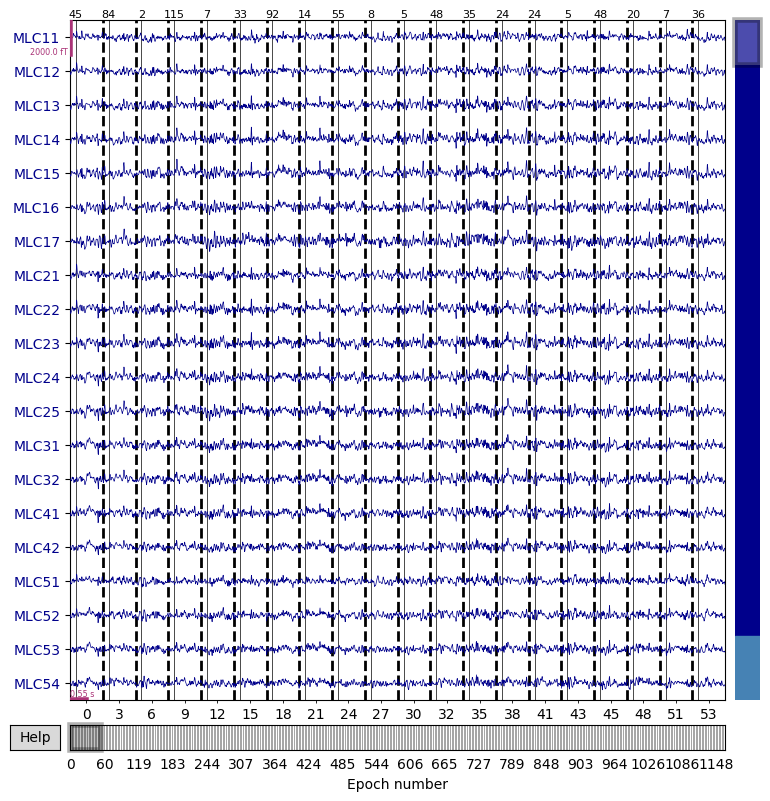

In [54]:
epochs.plot(events=True, event_color=dict([(i, 'black') for i in range(1,128)]))

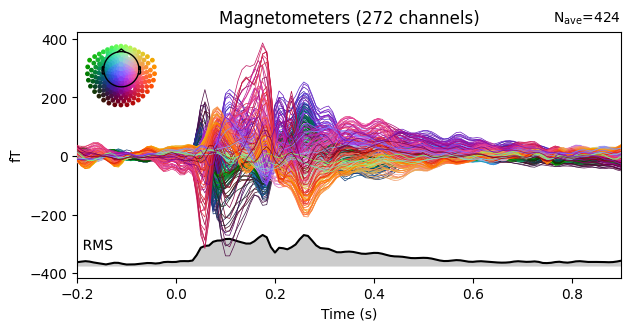

In [56]:
epochs.average().plot(spatial_colors=True, gfp=True)